# Project 02 - Image Processing

## Student Information

- Full name: Đinh Xuân Khương
- Student ID: 23127398
- Class: 23CLC04

## Required Libraries

In [1]:
# IMPORT YOUR LIBS HERE
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

## Function Definitions

In [ ]:

def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D) : np.ndarray
    '''
    try: 
        img = Image.open(img_path)
    except FileNotFoundError:
        print("File not found!")
    img.convert("RGB")  
    img = np.array(img)  
    return img 


def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img: numpy.ndarray
        Image (2D)
        
    Outputs
    -------
        An image is showed using matplotlib
    '''
    plt.imshow(img)
    plt.axis("off")
    plt.show()


def save_img(img : np.ndarray, img_path: str) -> None:
    '''
    Save image to img_path

    Parameters
    ----------
    img : numpy.ndarray
        Image (2D)
    img_path : str
        Path of image
    '''
    img = Image.fromarray(img) 
    img.save(img_path)
    


#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE
def brightness_control(img : np.ndarray, alpha : int = 55) -> np.ndarray:
    '''
    Description
    -----------
    Adjust brightness of the image
    alpha (in range [-255, 255]) is the value to adjust brightness
    
    
    Parameters
    ----------
    img : numpy.ndarray
        Image (2D)
    alpha : int
        Value to adjust brightness
        Default is 55, which increases brightness by 55.

    Returns
    -------
        Adjusted image (2D) : np.ndarray
    '''
    alpha = int(alpha)
    img = img.astype(np.int64)
    img = np.clip(img + alpha, 0, 255) 
    return img.astype(np.uint8) 


def contrast_control(img : np.ndarray, alpha : float = 1.5) -> np.ndarray:
    '''
    Adjust contrast of the image

    Parameters
    ----------
    img : numpy.ndarray
        Image (2D)
    alpha : float
        Value to adjust contrast
        Default is 1.5, which increases contrast

    Returns
    -------
        Adjusted image (2D) : np.ndarray
    '''
    img = img.astype(np.int64)
    img = np.clip((img - 128) * alpha + 128, 0, 255) 
    return img.astype(np.uint8)

def flip_img(img : np.ndarray, orientation = 'V') -> np.ndarray: 
    '''
    Description
    -----------
    Flip image along the specified axis
        if orientation is 'V', flip vertically
        if orientation is 'H', flip horizontally
        default is 'V' (vertical flip)
        if orientation is not 'V' or 'H', it will default to horizontal flip
    
    
    Parameters
    ----------
    img : numpy.ndarray
        Image (2D)
    orientation : 'H' or 'V'
        Axis to flip the image ('V' for vertical, 'H' for horizontal)

    Returns
    -------
        Flipped image (2D) : np.ndarray
    '''
    
    axis = 0 if orientation == 'V' else 1  # 0 for vertical, 1 for horizontal
    return np.flip(img, axis=axis)
 

def to_gray(img: np.ndarray) -> np.ndarray:
    '''
    Convert image to grayscale image.

    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB).

    Returns
    -------
    numpy.ndarray
        Grayscale image (2D array with shape [height, width]).
    '''
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError("Input image must be a 3-channel RGB image (shape [H, W, 3])")

    R = img[:, :, 0].astype(np.float32)
    G = img[:, :, 1].astype(np.float32)
    B = img[:, :, 2].astype(np.float32)

    gray_img = 0.299 * R + 0.587 * G + 0.114 * B
    gray_img = np.stack((gray_img,)*3, axis=-1) 
    gray_img = np.clip(gray_img, 0, 255).astype(np.uint8)

    return gray_img
def to_sepia(img: np.ndarray) -> np.ndarray:
    '''
    Convert image to sepia tone.

    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB).

    Returns
    -------
    numpy.ndarray
        Sepia-toned image (3D array with shape [height, width, 3]).
    '''
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError("Input image must be a 3-channel RGB image (shape [H, W, 3])")

    R = img[:, :, 0].astype(np.float32)
    G = img[:, :, 1].astype(np.float32)
    B = img[:, :, 2].astype(np.float32)
    
    sepia_r = 0.393*R + 0.769*G + 0.189*B
    sepia_g = 0.349*R + 0.686*G + 0.168*B
    sepia_b = 0.272*R + 0.534*G + 0.131*B
    sepia_img = np.stack((sepia_r, sepia_g, sepia_b), axis=-1)  
    sepia_img = np.clip(sepia_img, 0, 255).astype(np.uint8)

    return sepia_img

def sharpen(img: np.ndarray) -> np.ndarray:
    '''
    Sharpen the image using a convolution kernel.

    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB).

    Returns
    -------
    numpy.ndarray
        Sharpened image (3D array with shape [height, width, 3]).
    '''
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError("Input image must be a 3-channel RGB image (shape [H, W, 3])")

    kernel = np.array([[ 0, -1,  0],
                   [-1,  5, -1],
                   [ 0, -1,  0]])

    padded_img = np.pad(img, ((1, 1), (1, 1), (0, 0)), mode='edge')

    sharpened = np.zeros_like(img)

    for c in range(3):  # R, G, B
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                region = padded_img[i:i+3, j:j+3, c]
                sharpened[i, j, c] = np.clip(np.sum(region * kernel), 0, 255)

    return sharpened.astype(np.uint8)

def box_blur(img: np.ndarray) -> np.ndarray:
    '''
    Apply a box blur to the image.
    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB).
    Returns
    -------
    numpy.ndarray
        Blurred image (3D array with shape [height, width, 3]).
    '''
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError("Input image must be a 3-channel RGB image (shape [H, W, 3])")
    
    kernel = (1/9) * np.array([[1, 1, 1],
                               [1, 1, 1],
                               [1, 1, 1]])
    
    padded_img = np.pad(img, ((1,1), (1,1), (0, 0)), mode = 'constant', constant_values = 0)
    
    blur_img = np.zeros_like(img)
    for c in range(3):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                region = padded_img[i:i+3, j:j+3, c]
                blur_img[i, j, c] = np.clip(np.sum(region * kernel), 0, 255)
    
    return blur_img.astype(np.uint8)

def gaussian_blur3(img: np.ndarray) -> np.ndarray:
    '''
    Apply Gaussian blur to the image with 3x3 kernel.
    
    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB).
        
    Returns
    -------
    numpy.ndarray
        Blurred image (3D array with shape [height, width, 3]).
    '''
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError("Input image must be a 3-channel RGB image (shape [H, W, 3])")
    
    kernel = (1/16) * np.array([[1, 2, 1],
                               [2, 4, 2],
                               [1, 2, 1]])
    
    padded_img = np.pad(img, ((1,1), (1,1), (0, 0)), mode = 'constant', constant_values = 0)
    
    blur_img = np.zeros_like(img)
    for c in range(3):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                region = padded_img[i:i+3, j:j+3, c]
                blur_img[i, j, c] = np.clip(np.sum(region * kernel), 0, 255)
    
    return blur_img.astype(np.uint8)
  
def gaussian_blur5(img: np.ndarray) -> np.ndarray:
    '''
    Apply Gaussian blur to the image with 5x5 kernel.
    
    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB).
        
    Returns
    -------
    numpy.ndarray
        Blurred image (3D array with shape [height, width, 3]).
    '''
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError("Input image must be a 3-channel RGB image (shape [H, W, 3])")
    
    kernel = (1/256) * np.array([[1, 4, 6, 4, 1],
                                 [4, 16, 24, 16, 4],
                                 [6, 24, 36, 24, 6],
                                 [4, 16, 24, 16, 4],
                                 [1, 4, 6, 4, 1]])
    
    padded_img = np.pad(img, ((2,2), (2,2), (0, 0)), mode = 'constant', constant_values = 0)
    
    blur_img = np.zeros_like(img)
    
    for c in range(3):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                region = padded_img[i:i+5, j:j+5, c]
                blur_img[i, j, c] = np.clip(np.sum(region * kernel), 0, 255)
    
    return blur_img.astype(np.uint8)

def center_crop_img(img: np.ndarray) -> np.ndarray:
    '''
    crop the image to the center region.
    
    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB).
        
    Returns
    -------
    numpy.ndarray
        cropped image (3D array with shape [height/2, width/2, 3]).
    '''
    
    h, w, _ = img.shape
    
    new_img = img[h//4: h//4 + h//2, w//4 : w//4 + w//2,:]
    
    return new_img
    
    
def circle_crop(img: np.ndarray) -> np.ndarray:
    '''
    Crop the image to a circular region.
    
    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB).
        
    Returns
    -------
    numpy.ndarray
        Circular cropped image (3D array with shape [height, width, 3]).
    '''
    
    h, w, _ = img.shape
    center = (h // 2, w // 2)
    radius = min(center)
    
    Y, X = np.ogrid[:h, :w]
    mask = (X - center[1])**2 + (Y - center[0])**2 <= radius**2
    
    circular_cropped_img = np.zeros_like(img)
    circular_cropped_img[mask] = img[mask]
    
    return circular_cropped_img          

def ellipse_crop(img: np.ndarray, alpha = 0.8) -> np.ndarray:
    '''Crop the image to 2 elliptical regions.
    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB
    alpha : float, optional
        Scaling factor for the ellipse axes. Default is 0.8.
        alpha in range 0 < alpha < 1 controls the size of the ellipse.
    Returns
    -------
    numpy.ndarray
        Elliptical cropped image (3D array with shape [height, width, 3]).
    '''
    
    n = min(img.shape[:2])
    
    b_squared = (n**2)/2 * alpha # 0 < b < sqrt(2)n/2 -> 0 < b^2 < n^2/2
    a_squared =  (n**2)/2 - b_squared

    h = k = n // 2
   
    Y, X = np.ogrid[:img.shape[0], :img.shape[1]]

    x = X - h
    y = Y - k

    theta1 = np.radians(45)
    theta2 = np.radians(135)

    u1 = x * np.cos(theta1) + y * np.sin(theta1)
    v1 = -x * np.sin(theta1) + y * np.cos(theta1)
    mask1 = ((u1**2) / a_squared + (v1**2) / b_squared <= 1)

    
    u2 = x * np.cos(theta2) + y * np.sin(theta2)
    v2 = -x * np.sin(theta2) + y * np.cos(theta2)
    mask2 = ((u2**2) / a_squared + (v2**2) / b_squared <= 1)

    
    ellipse_cropped_img = np.zeros_like(img)
    ellipse_cropped_img[mask1 | mask2] = img[mask1 | mask2]

    return ellipse_cropped_img

def process_image(file_path : str, option : int) -> None:
    ''' 
    Process the image based on the selected option.
    Parameters
    ----------
    file_path : str
        Path of the image file.
    option : int
        Option to select the processing type and save the image after processing:
        0: All processing 
        1: Brightness control 
        2: Contrast control 
        3: Flip image (vertical or horizontal)
        4: Convert to grayscale or sepia 
        5: Blur and sharpen 
        6: Crop image in the center
        7: Crop image to circular and elliptical regions
    Returns
    -------
    None
    
    '''
    
    img = read_img(file_path)
    image_name = file_path.split('/')[-1].split('\\')[-1].split('.')[0]
    extension = file_path.split('/')[-1].split('\\')[-1].split('.')[-1]
    
    plt.title("Original Image")
    show_img(img)
    match option:
        case 0:
            img_high_brightness = brightness_control(img)
            img_low_brightness = brightness_control(img, -100)
            img_high_contrast = contrast_control(img)
            img_low_contrast = contrast_control(img, 0.5)
            img_flipped_v = flip_img(img, 'V')
            img_flipped_h = flip_img(img, 'H')
            img_gray = to_gray(img)
            img_sepia = to_sepia(img)
            img_sharpened = sharpen(img)
            img_box_blurred = box_blur(img)
            # img_gaussian_blurred3 = gaussian_blur3(img)
            # img_gaussian_blurred5 = gaussian_blur5(img)
            img_cropped = center_crop_img(img)
            img_circle_cropped = circle_crop(img)
            img_ellipse_cropped = ellipse_crop(img)
            save_img(img_high_brightness, image_name + "_high_brightness" + f".{extension}")
            
            save_img(img_low_brightness, image_name + "_low_brightness" + f".{extension}")
            save_img(img_high_contrast, image_name + "_high_contrast" + f".{extension}")
            save_img(img_low_contrast, image_name + "_low_contrast" + f".{extension}")
            save_img(img_flipped_v, image_name + "_flipped_vertical" + f".{extension}")
            save_img(img_flipped_h, image_name + "_flipped_horizontal" + f".{extension}")
            save_img(img_gray, image_name + "_gray" + f".{extension}")
            save_img(img_sepia, image_name + "_sepia" + f".{extension}")
            save_img(img_sharpened, image_name + "_sharpened" + f".{extension}")
            save_img(img_box_blurred, image_name + "_box_blurred" + f".{extension}")
            # save_img(img_gaussian_blurred3, image_name + "_gaussian_blurred_3x3_kernel.png")
            # save_img(img_gaussian_blurred5, image_name + "_gaussian_blurred_5x5_kernel.png")
            save_img(img_cropped, image_name + "_center_cropped" + f".{extension}")
            save_img(img_circle_cropped, image_name + "_circle_cropped" + f".{extension}")
            save_img(img_ellipse_cropped, image_name + "_ellipse_cropped" + f".{extension}")
            
            plt.title("Image with high brightness")
            show_img(img_high_brightness)
            plt.title("Image with low brightness")
            show_img(img_low_brightness)
            plt.title("Image with high contrast")
            show_img(img_high_contrast)
            plt.title("Image with low contrast")
            show_img(img_low_contrast)
            plt.title("Image flipped vertically")
            show_img(img_flipped_v)
            plt.title("Image flipped horizontally")
            show_img(img_flipped_h)
            plt.title("Grayscale image")
            show_img(img_gray)
            plt.title("Sepia image")
            show_img(img_sepia)
            plt.title("Sharpened image")
            show_img(img_sharpened)
            plt.title("Box blurred image")
            show_img(img_box_blurred)
            # plt.title("Gaussian blurred image (3x3 kernel)")
            # show_img(img_gaussian_blurred3)
            # plt.title("Gaussian blurred image (5x5 kernel)")
            # show_img(img_gaussian_blurred5)
            plt.title("Center cropped image")
            show_img(img_cropped)
            plt.title("Circular cropped image")
            show_img(img_circle_cropped)
            plt.title("Elliptical cropped image")
            show_img(img_ellipse_cropped)
            
        case 1:
            alpha = input("Enter the brightness adjustment value (default is 55): ")

            try:
                alpha = int(alpha)
                if alpha < -255 or alpha > 255:
                    print("Invalid value! Using default value of 55.")
                    alpha = 55
            except ValueError:
                print("Invalid value! Using default value of 55.")
                alpha = 55
            img_brightness_control = brightness_control(img, alpha)
            
            plt.title("Image with adjusted brightness")
            show_img(img_brightness_control)
            save_img(img_brightness_control, image_name + "_brightness_control" + f".{extension}")
        case 2:
            alpha = float(input("Enter the contrast adjustment value (default is 1.5): ").isdigit() and float(input("Enter the contrast adjustment value (default is 1.5): ")) or 1.5)
            if alpha <= 0:
                print("Invalid value! Using default value of 1.5")
                alpha = 1.5
            img_contrast_control = contrast_control(img, alpha)
            plt.title("Image with adjusted contrast")
            show_img(img_contrast_control)
            save_img(img_contrast_control, image_name + "_contrast_control" + f".{extension}")
        case 3:
            orientation = input("Enter the orientation to flip the image ('V' for vertical, 'H' for horizontal, default is 'V'): ").strip().upper()
            
            if orientation not in ['V', 'H']:
                print("Invalid orientation! Defaulting to vertical flip.")
                orientation = 'V'
            img_flipped = flip_img(img, orientation)
            plt.title(f"Image flipped {'vertically' if orientation == 'V' else 'horizontally'}")
            show_img(img_flipped)
            save_img(img_flipped, image_name + f"_flipped_{'vertical' if orientation == 'V' else 'horizontal'} " + f".{extension}")
        case 4:
            img_gray = to_gray(img)
            img_sepia = to_sepia(img)
            plt.title("Grayscale image")
            show_img(img_gray)
            plt.title("Sepia image")
            show_img(img_sepia)
            save_img(img_gray, image_name + "_gray" + f".{extension}")
            save_img(img_sepia, image_name + "_sepia" + f".{extension}")
        case 5:
            img_box_blurred = box_blur(img)
            # img_gaussian_blurred3 = gaussian_blur3(img)
            # img_gaussian_blurred5 = gaussian_blur5(img)
            plt.title("Box blurred image")
            show_img(img_box_blurred)
            # plt.title("Gaussian blurred image (3x3 kernel)")
            # show_img(img_gaussian_blurred3)
            # plt.title("Gaussian blurred image (5x5 kernel)")
            # show_img(img_gaussian_blurred5)
            img_sharpened = sharpen(img)
            plt.title("Sharpened image")
            show_img(img_sharpened)
            save_img(img_box_blurred, image_name + "_box_blurred" + f".{extension}")
            save_img(img_sharpened, image_name + "_sharpened" + f".{extension}")
            
        case 6:
            img_cropped = center_crop_img(img)
            plt.title("Center Cropped image")
            show_img(img_cropped)
            save_img(img_cropped, image_name + "_center_cropped" + f".{extension}")
            
        case 7:
            alpha = float(input("Enter the scaling factor for the ellipse axes 0 < alpha < 1 (default is 0.8): ").isdigit() and float(input("Enter the scaling factor for the ellipse axes 0 < alpha < 1 (default is 0.8): ")) or 0.8)
            if alpha <= 0 or alpha >= 1:
                print("Invalid value! Using default value of 0.8.")
                alpha = 0.8
            
            
            img_circle_cropped = circle_crop(img)
            img_ellipse_cropped = ellipse_crop(img, alpha)
            plt.title("Circular cropped image")
            show_img(img_circle_cropped)
            plt.title("Elliptical cropped image")
            show_img(img_ellipse_cropped)
            save_img(img_circle_cropped, image_name + "_circle_cropped" + f".{extension}")
            save_img(img_ellipse_cropped, image_name + "_ellipse_cropped" + f".{extension}")
    
            
            
            
    
    

<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

## Main FUNCTION

In [4]:
# YOUR CODE HERE
def main():
    file_path = input("Enter the path to the image file: ")
    
    options = """
    0. Save images with all transformations applied (default)
    1. Apply brightness control
    2. Apply contrast control
    3. Flip image vertically and horizontally
    4. Convert to grayscale and sepia
    5. Sharpen the image and apply blur
    6. Crop the image to the center region
    7. Circular crop the image and symmetrical 2-ellipse crop the image
    """
    
    print("Please choose an option:")
    number = input(options)
    number = int(number) if number.isdigit() else -1
    if number < 0 or number > 7:
        print("Invalid option. Defaulting to option 0.")
        number = 0
    
    process_image(file_path, number)

Please choose an option:


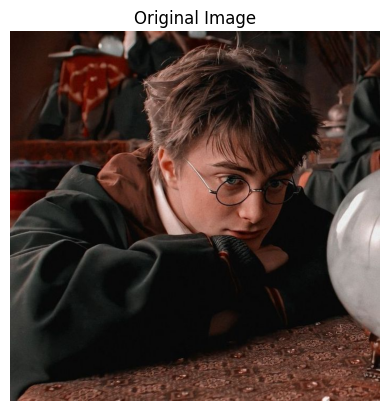

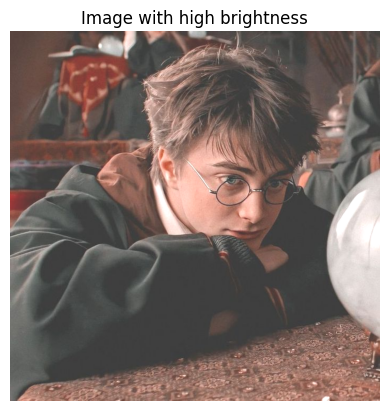

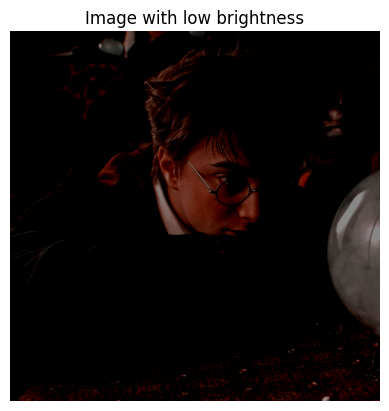

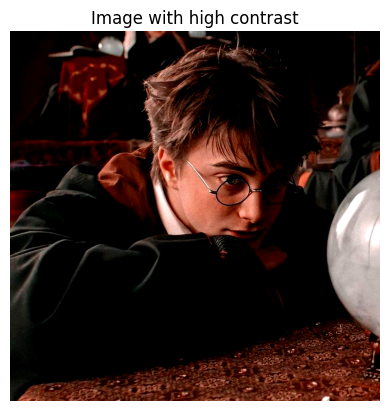

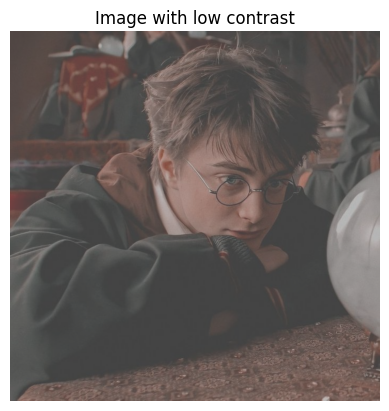

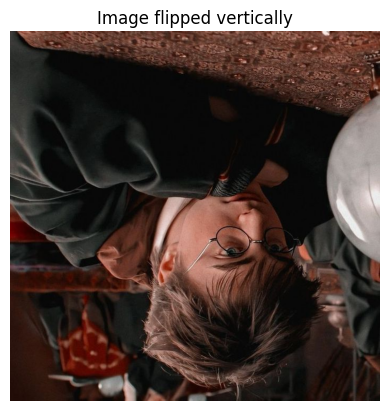

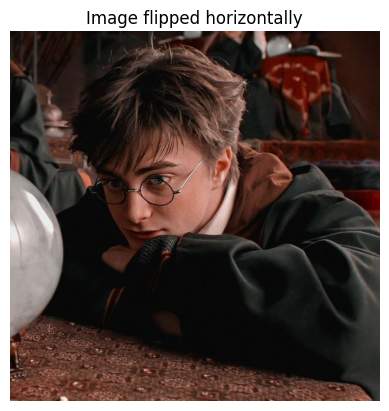

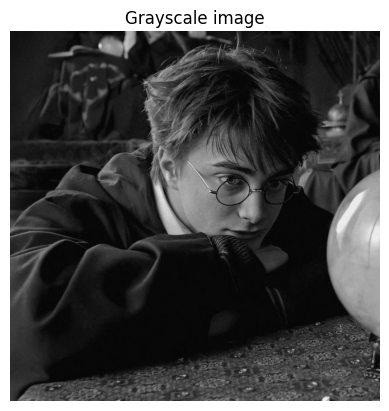

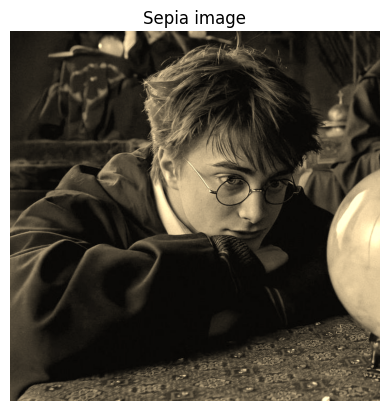

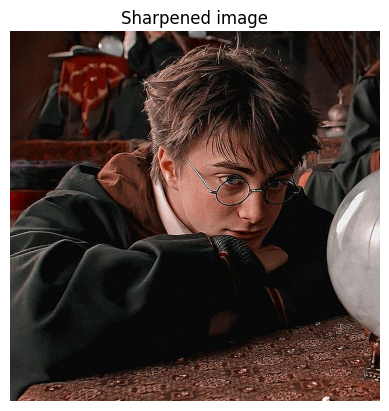

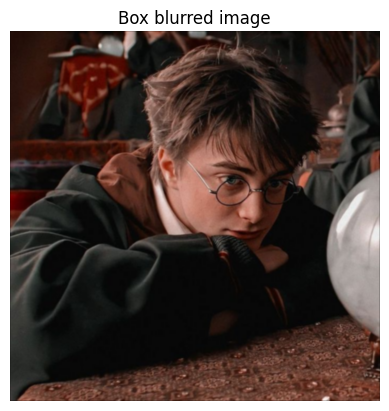

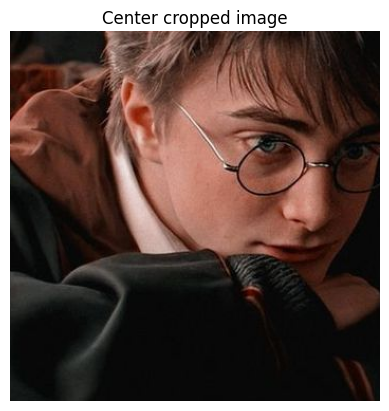

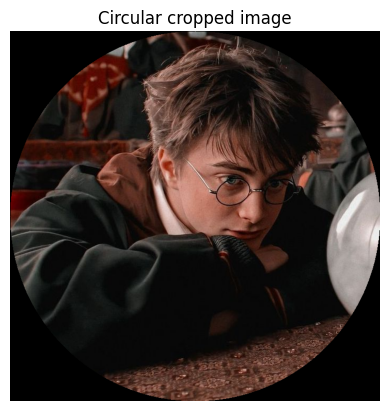

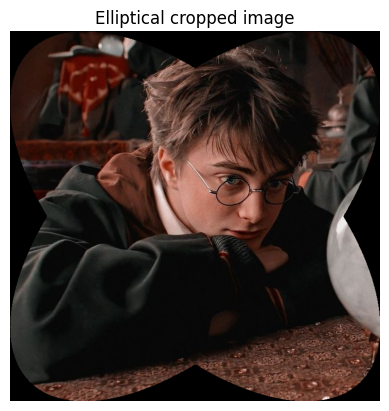

In [6]:
# Call main function
if __name__ == "__main__":
    main()